## Description

Imagine being able to handle data where the response variable is either binary, count, or approximately normal, all under one single framework. Well, you don't have to imagine. Enter the Generalized Linear Models in Python course! In this course you will extend your regression toolbox with the logistic and Poisson models, by learning how to fit, understand, assess model performance and finally use the model to make predictions on new data. You will practice using data from real world studies such the largest population poisoning in world's history, nesting of horseshoe crabs and counting the bike crossings on the bridges in New York City.

### Introduction to GLMs

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

In [32]:
salary = pd.read_csv('salary.csv')

In [33]:
# Fit a linear model
model_lm = ols(formula = 'Salary ~ Experience',
               data = salary).fit()

# View model coefficients
print(model_lm.params)

Intercept     25792.200199
Experience     9449.962321
dtype: float64


In [34]:
# Fit a GLM
model_glm = glm(formula = 'Salary ~ Experience',
                data = salary,
                family = sm.families.Gaussian()).fit()

# View model coefficients
print(model_glm.params)

Intercept     25792.200199
Experience     9449.962321
dtype: float64


**Looking at the coefficient estimates notice how both models give the same values.**

### Data type and distribution family

#### Linear model and a binary response variable

In [35]:
crab = pd.read_csv('crab.csv')

In [36]:
# Define model formula
formula = 'y ~ width'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = crab, family = family_LM).fit()
print(model_LM.summary())

# Define and fit a logistic regression model
model_GLM = glm(formula = formula, data = crab, family = family_GLM).fit()
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.19515
Method:                          IRLS   Log-Likelihood:                -103.13
Date:                Sat, 06 Nov 2021   Deviance:                       33.371
Time:                        16:32:57   Pearson chi2:                     33.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1730
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7655      0.421     -4.190      0.0

**Defining model formula should look familiar from linear regression. In GLMs you have to pay special attention to the family argument which specifies the probability distribution of the response.**

In [37]:
crab_train = crab[:150]
crab_test = crab[150:]

In [38]:
# View test set
#print(crab_test)

# Compute estimated probabilities for linear model: pred_lm
Pred_LM = model_LM.predict(crab_test)

# Compute estimated probabilities for GLM model: pred_glm
Pred_GLM = model_GLM.predict(crab_test)

# Create dataframe of predictions for linear and GLM model: predictions
predictions = pd.DataFrame({'Pred_LM': Pred_LM, 'Pred_GLM': Pred_GLM})

# Concatenate test sample and predictions and view the results
all_data = pd.concat([crab_test, predictions], axis = 1)
all_data.head()

,crab,sat,y,weight,width,color,spine,width_C,Pred_LM,Pred_GLM
150,151,4,1,2.85,27.6,2,3,"[27.25, 28.25)",0.760714,0.797824
151,152,0,0,2.30,26.2,2,3,"[25.25, 26.25)",0.632571,0.662985
152,153,0,0,2.00,23.1,2,1,"[0.0, 23.25)",0.348826,0.296339
153,154,0,0,1.60,22.9,2,1,"[0.0, 23.25)",0.330520,0.276031
154,155,0,0,1.90,24.5,4,3,"[24.25, 25.25)",0.476969,0.457933


**Comparing the predicted values for both models, the GLM model provides values within the (0,1) range as is required by the binary response variable.**

In [39]:
wells = pd.read_csv('wells.csv')

In [40]:
# Define the formula the the logistic model
model_formula = 'switch ~ distance100'

# Fit the model
wells_fit = glm(formula = model_formula, 
                 data = wells, 
                 family = sm.families.Binomial()).fit()

In [41]:
# View the results of the wells_fit model
print(wells_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.6
Date:                Sat, 06 Nov 2021   Deviance:                       4061.3
Time:                        16:33:08   Pearson chi2:                 3.01e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01409
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6108      0.060     10.104      

#### Extracting parameter estimates

In [42]:
# Extract coefficients from the fitted model wells_fit
intercept, slope = wells_fit.params

# Print coefficients
print('Intercept =', intercept)
print('Slope =', slope)

# Extract and print confidence intervals
print(wells_fit.conf_int())

Intercept = 0.6108118803818954
Slope = -0.6290808479557684
                    0         1
Intercept    0.492327  0.729297
distance100 -0.820345 -0.437816


## Modeling Binary Data

### Fit logistic regression

In [43]:
# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ arsenic',
                data = wells,
                family = sm.families.Binomial()).fit()

# Print model summary
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.3
Date:                Sat, 06 Nov 2021   Deviance:                       3994.6
Time:                        16:33:20   Pearson chi2:                 3.03e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03570
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3058      0.070     -4.340      0.0

### Coefficients in terms of odds

In [44]:
# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ distance100',
                data = wells,
                family = sm.families.Binomial()).fit()

# Extract model coefficients
print('Model coefficients: \n', model_GLM.params)

# Compute the multiplicative effect on the odds
print('Odds: \n', np.exp(model_GLM.params))

Model coefficients: 
 Intercept      0.610812
distance100   -0.629081
dtype: float64
Odds: 
 Intercept      1.841926
distance100    0.533082
dtype: float64


In [45]:
# Define x at 1.5
x = 1.5

wells_GLM = glm(formula = 'switch ~ distance100',
                data = wells,
                family = sm.families.Binomial()).fit()

# Extract intercept & slope from the fitted model
intercept, slope = wells_GLM.params

# Compute and print the estimated probability
est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))
print('Estimated probability at x = 1.5: ', round(est_prob, 4))

# Compute the slope of the tangent line for parameter beta at x
slope_tan = slope * est_prob * (1 - est_prob)
print('The rate of change in probability: ', round(slope_tan,3))

Estimated probability at x = 1.5:  0.4176
The rate of change in probability:  -0.153


**So at the `distance100` value of 1.5 the estimated probability is 0.419 with the rate of change in the estimated probability of negative 0.1514. This means that for every `100` m increase in `distance100` at the `distance100` value of 1.5 the probability of well switch decreases by 15,14%.**

### Statistical significance

In [46]:
crab = pd.read_csv('crab.csv')

In [47]:
# Fit logistic regression and save as crab_GLM
crab_GLM = glm('y ~ width', data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(crab_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.226
Date:                Sat, 06 Nov 2021   Deviance:                       194.45
Time:                        17:00:44   Pearson chi2:                     165.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1655
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.0

**Yes, the estimate is positive meaning that the fit is upward sloping which means that width increases the chance of a satellite.**

### Computing Wald statistic

In [48]:
# Extract coefficients
intercept, slope = crab_GLM.params

# Estimated covariance matrix: crab_cov
crab_cov = crab_GLM.cov_params()
print(crab_cov)

# Compute standard error (SE): std_error
std_error = np.sqrt(crab_cov.loc['width', 'width'])
print('SE: ', round(std_error, 4))

# Compute Wald statistic
wald_stat = slope/std_error
print('Wald statistic: ', round(wald_stat,4))

           Intercept     width
Intercept   6.910158 -0.266848
width      -0.266848  0.010350
SE:  0.1017
Wald statistic:  4.8875


**With the Wald statistic at 4.887 we can conclude that the width variable is statistically significant if we apply the rule of thumb cut-off value of 2.**

In [53]:
# Extract and print confidence intervals
print(crab_GLM.conf_int())

                   0         1
Intercept -17.503010 -7.198625
width       0.297833  0.696629


In [52]:
# Compute confidence intervals for the odds
print(np.exp(crab_GLM.conf_int()))

                      0         1
Intercept  2.503452e-08  0.000748
width      1.346936e+00  2.006975


**We can conclude that a 1 cm increase in width of a female crab has at least 35% increase odds (from lower bound) and at most it doubles the odds (from upper bound) that a satellite crab is present.**

### Visualize model fit using regplot()


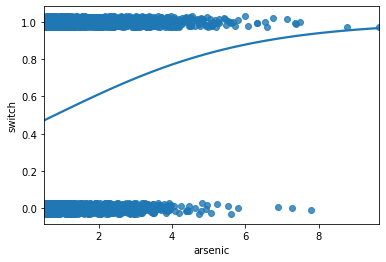

In [55]:
# Plot distance and switch and add overlay with the logistic fit
sns.regplot(x = 'arsenic', y = 'switch', 
            y_jitter = 0.03,
            data = wells, 
            logistic = True,
            ci = None)

# Display the plot
plt.show()

### Compute predictions

Often, in practice, we are interested in using the fitted logistic regression to estimate the probabilities and construct confidence intervals for these estimates. Using the wells dataset and the model 'switch ~ arsenic' let's assume you have new observations wells_test which were not part of the training sample and you wish to predict the probability of switching to the nearest safe well.

In [93]:
wells_train, wells_test = train_test_split(wells, test_size=0.0665, random_state = 111)

In [95]:
# Compute predictions for the test sample wells_test and save as prediction
prediction = wells_fit.predict(exog = wells_test)

# Add prediction to the existing data frame wells_test and assign column name prediction
wells_test['prediction'] = prediction

# Examine the first 5 computed predictions
print(wells_test[['switch', 'arsenic', 'prediction']].head())

      switch  arsenic  prediction
1681       1     2.42    0.608834
1354       1     2.29    0.425674
2102       1     1.23    0.601674
2954       1     3.66    0.612492
794        0     2.95    0.475672


### Compute confusion matrix

In [96]:
# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = wells_test['switch']

# Compute and print confusion matrix using crosstab function
conf_mat = pd.crosstab(y_actual, y_prediction, 
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_mat)

Predicted   0    1  All
Actual                 
0          15   61   76
1          15  110  125
All        30  171  201


**This simple model has 129 errors by inccorectly predicting switching of the well and 50 error by incorrectly predicting not switching of the well.**

## Modeling Count Data

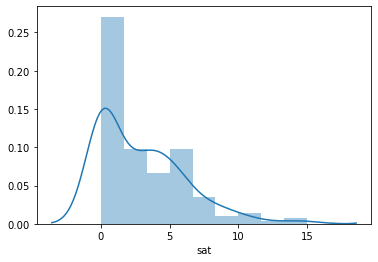

In [97]:
# Plot sat variable
sns.distplot(crab['sat'])

# Display the plot
plt.show()

### Fitting a Poisson regression

In [100]:
# Fit Poisson regression of sat by weight
model = glm('sat ~ weight', data = crab, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.08
Date:                Sat, 06 Nov 2021   Deviance:                       560.87
Time:                        20:28:36   Pearson chi2:                     536.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4284      0.179     -2.394      0.0

### Estimate parameter lambda

In [105]:
# Compute average crab width
mean_width = np.mean(crab['width'])

# Print the compute mean
print('Average width: ', round(mean_width, 3))

# Extract coefficients
intercept, slope = model.params

# Compute the estimated mean of y (lambda) at the average width
est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

# Print estimated mean of y
print('Estimated mean of y at average width: ', round(est_lambda,2), 3)

Average width:  26.299
Estimated mean of y at average width:  3504688.54 3


**The Poisson regression model states that at the mean value of female crab width of 26.3 the expected mean number of satellite crabs present is 2.74.**

In [106]:
# Compute and print sample mean of the number of satellites: sat_mean
sat_mean = np.mean(crab.sat)

print('Sample mean:', round(sat_mean, 3))

# Compute and print sample variance of the number of satellites: sat_var
sat_var= np.var(crab.sat)
print('Sample variance:', round(sat_var, 3))

# Compute ratio of variance to mean
print('Ratio:', round(sat_var/sat_mean, 3))

Sample mean: 2.919
Sample variance: 9.855
Ratio: 3.376


**Notice that the variance is 3.37 times the mean. This gives an indication that Poisson GLM will not provide the most accurate fit to the data.**

### Computing expected number of counts

In [109]:
# Expected number of zero counts
exp_zero_cnt = ((sat_mean**0)*np.exp(-sat_mean))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of ', round(sat_mean,3), 
      'is ', round(exp_zero_cnt,3)*100)

# Number of zero counts in sat variable
actual_zero_ant = sum(crab['sat']  == 0)

# Number of observations in crab dataset
num_obs = len(crab)

# Print the percentage of zero count observations in the sample
print('Actual zero counts in the sample: ', round(actual_zero_ant / num_obs,3)*100)

Expected zero counts given mean of  2.919 is  5.4
Actual zero counts in the sample:  35.8


**Notice that given the mean parametar there should be 5.4% observations with zero count, but in the crab sample there are 35.8% observations with zero count, indicating the presence of overdispersion.**

#### Checking for overdispersion

In [113]:
# Compute and print the overdispersion approximation
crab_pois = glm(formula = 'sat ~ weight', data = crab, family = sm.families.Poisson()).fit()
print(crab_pois.pearson_chi2 / crab_pois.df_resid)

3.133893126616755


**There is overdispersion present since the ratio is greater than 1, meaning that the coefficient estimates should not be interpreted directly.**

### Fitting negative binomial

In [115]:
# Define the formula for the model fit
formula = 'sat ~ width'

# Fit the GLM negative binomial model using log link function
crab_NB = glm(formula = formula, data = crab, 
				  family = sm.families.NegativeBinomial()).fit()

# Print Poisson model's summary
print(crab_pois.summary())

# Print the negative binomial model's summary
print(crab_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.08
Date:                Sun, 07 Nov 2021   Deviance:                       560.87
Time:                        12:51:36   Pearson chi2:                     536.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3402
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4284      0.179     -2.394      0.0

**Notice how standard error increased to 0.042, reflecting overdispersion which was not captured with the Poisson model.**

#### Confidence intervals for negative Binomial model

In [116]:
# Compute confidence intervals for crab_Pois model
print('Confidence intervals for the Poisson model')
print(crab_pois.conf_int())

# Compute confidence intervals for crab_NB model
print('Confidence intervals for the Negative Binomial model')
print(crab_NB.conf_int())

Confidence intervals for the Poisson model
                  0         1
Intercept -0.779112 -0.077699
weight     0.461873  0.716735
Confidence intervals for the Negative Binomial model
                  0         1
Intercept -6.244509 -1.820000
width      0.108155  0.274472


**Notice how the confidence intervals are wider for the negative Binomial model compared to quite narrow confidence intervals for the Poisson model since it did not account for overdispersion.**

### Plotting data and linear model fit

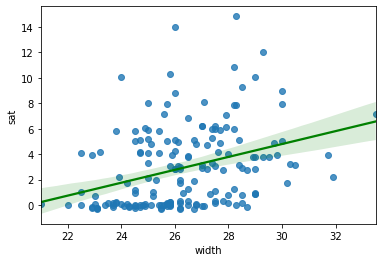

In [117]:
# Plot the data points and linear model fit
sns.regplot('width', 'sat', data = crab,
            y_jitter = 0.3,
            fit_reg = True,
            line_kws = {'color':'green', 
                        'label':'LM fit'})

# Print plot
plt.show()

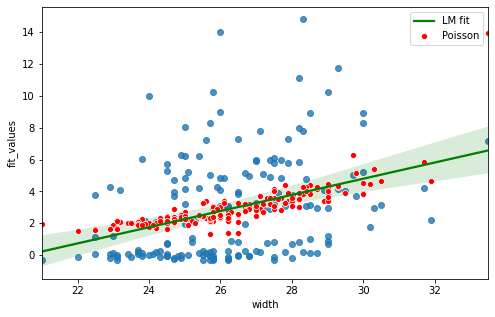

In [120]:
# Add fitted values to the fit_values column of crab dataframe
crab['fit_values'] = crab_pois.fittedvalues

plt.subplots(figsize = (8,5))

# Plot data points
sns.regplot('width', 'sat', data = crab,
            y_jitter = 0.3,
            fit_reg = True, 
            line_kws = {'color':'green', 
                        'label':'LM fit'})

# Poisson regression fitted values
sns.scatterplot('width', 'fit_values', data = crab,
           color = 'red', label = 'Poisson')

# Print plot          
plt.show()

**Great, now we can compare both fits on one graph! Similary as for the model with weight variable the linear and Poisson fits are close in the mid range of width values, but diverge on smaller and larger values.**

## Multivariable Logistic Regression

In [121]:
# Define model formula
formula = 'y ~ width + color'

# Fit GLM
model = glm(formula = formula, data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.561
Date:                Sun, 07 Nov 2021   Deviance:                       189.12
Time:                        14:45:29   Pearson chi2:                     170.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1909
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0708      2.807     -3.588      0.0

**From model summary note that for each one-level increase in color of the female crab, the estimated odds multiply by exp(-0.509)=0.6, i.e. the odds for dark crabs are 60% than those for medium crabs.**

In [122]:
# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Define model formula
formula = 'y ~ weight + width'

# Fit GLM
model = glm(formula = formula, data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.446
Date:                Sun, 07 Nov 2021   Deviance:                       192.89
Time:                        14:48:58   Pearson chi2:                     167.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1730
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3547      3.528     -2.652      0.0

**Notice that the neither weight nor width are statistically significant. Recall that when we fitted univariate logistic regressions for each variable, both variables where statistically significant. There is evident presence of multicollinearity!**

### Compute VIF

In [124]:
# Get variables for which to compute VIF and add intercept term
X = crab[['weight', 'width', 'color']]
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

<ipython-input-124-d420b61353bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


   variables         VIF
0     weight    4.691018
1      width    4.726378
2      color    1.076594
3  Intercept  414.163343


**With VIF well above 2.5 for weight and width means that there is multicollinearity present in the model and you can not use both variables in the model.**

In [127]:
# Define model formula
formula = 'switch ~ distance + arsenic'
formula1 = 'switch ~ distance100'

# Fit GLM

model_dist = glm(formula = formula1, data = wells, family = sm.families.Binomial()).fit()
model_dist_ars = glm(formula = formula, data = wells, family = sm.families.Binomial()).fit()

# Compare deviance of null and residual model
diff_deviance = model_dist_ars.null_deviance - model_dist_ars.deviance

# Print the computed difference in deviance
print(diff_deviance)

188.76305963384902


**Having both distance100 and arsenic in the model reduces deviance by 187 compared to the intercept only model. But what is the actual impact of additional variable arsenic?**

### Compare two models

In [128]:
# Compute the difference in adding distance100 variable
diff_deviance_distance = model_dist.null_deviance - model_dist.deviance

# Print the computed difference in deviance
print('Adding distance100 to the null model reduces deviance by: ', 
      round(diff_deviance_distance,3))

# Compute the difference in adding arsenic variable
diff_deviance_arsenic = model_dist.deviance - model_dist_ars.deviance

# Print the computed difference in deviance
print('Adding arsenic to the distance model reduced deviance further by: ', 
      round(diff_deviance_arsenic,3))

Adding distance100 to the null model reduces deviance by:  42.726
Adding arsenic to the distance model reduced deviance further by:  146.037


**Adding distance100 to the null model reduces deviance by 41.9 and with an addition of arsenic the deviance further reduces by 145. Having such large reduction than expected reduction by 1 we can conclude that the multivariate model has improved the model fit.**

### Deviance and linear transformation

In [129]:
# Fit logistic regression model as save as model_dist_1
model_dist_1 = glm('switch ~ distance', data = wells, family = sm.families.Binomial()).fit()

# Check the difference in deviance of model_dist_1 and model_dist
print('Difference in deviance is: ', round(model_dist_1.deviance - model_dist.deviance,3))

Difference in deviance is:  0.0


**Note that linear transformations do not change the model error and hence the deviance remains the same. The reason being since linear transformation does not add new data information to the model.**

### Model matrix for continuous variables

In [132]:
# Construct model matrix with arsenic and distance100
model_matrix = dmatrix('arsenic + distance100', data = wells, return_type = 'dataframe')
model_matrix1 = dmatrix('arsenic', data = wells, return_type = 'dataframe')
print(model_matrix.head(5))
print(model_matrix1.head(5))

   Intercept  arsenic  distance100
0        1.0     2.36      0.16826
1        1.0     0.71      0.47322
2        1.0     2.07      0.20967
3        1.0     1.15      0.21486
4        1.0     1.10      0.40874
   Intercept  arsenic
0        1.0     2.36
1        1.0     0.71
2        1.0     2.07
3        1.0     1.15
4        1.0     1.10


**Notice how `dmatrix()` silently includes an intercept for each model matrix without you specifying it. Analyzing the output from `dmatrix()` we can be sure that the inputs are correctly structured.**

#### Variable transformation

In [133]:
# Construct model matrix for arsenic with log transformation
dmatrix('np.log(arsenic)', data = wells,
       return_type = 'dataframe').head()

#Define model formula
formula = 'switch ~ np.log(arsenic)'

# Fit GLM
model_log_ars = glm(formula = formula, data = wells, 
                     family = sm.families.Binomial()).fit()

# Print model summary
print(model_log_ars.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.6
Date:                Sun, 07 Nov 2021   Deviance:                       3975.3
Time:                        18:16:23   Pearson chi2:                 3.01e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04187
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0966      0.041     

**Comparing the deviance of the model with log(arsenic) and deviance of the model with arsenic there is a reduction in deviance of 19.38, which is larger than expected 1 and hence it does improve the model fit.**

### Coding categorical variables

In [135]:
# Construct and print model matrix for color as categorical variable
print(dmatrix('C(color)', data = crab,
     	   return_type = 'dataframe').head())

   Intercept  C(color)[T.2]  C(color)[T.3]  C(color)[T.4]
0        1.0            1.0            0.0            0.0
1        1.0            0.0            1.0            0.0
2        1.0            0.0            0.0            0.0
3        1.0            0.0            1.0            0.0
4        1.0            0.0            1.0            0.0


In [136]:
# Construct and print the model matrix for color with reference group 3
print(dmatrix('C(color, Treatment(3))', 
     	  data = crab,
     	  return_type = 'dataframe').head())

   Intercept  C(color, Treatment(3))[T.1]  C(color, Treatment(3))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(3))[T.4]  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  


**Notice the change in columns where now the medium dark category is the reference group, where its mean behavior is represented by the intercept.**

### Modeling with categorical variable

In [137]:
# Construct model matrix
model_matrix = dmatrix('C(color, Treatment(4))' , data = crab, 
                       return_type = 'dataframe')

# Print first 5 rows of model matrix
print(model_matrix.head())

# Fit and print the results of a glm model with the above model matrix configuration
model = glm('y ~ C(color, Treatment(4))', data = crab, 
            family = sm.families.Binomial()).fit()

print(model.summary())

   Intercept  C(color, Treatment(4))[T.1]  C(color, Treatment(4))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(4))[T.3]  
0                          0.0  
1                          1.0  
2                          0.0  
3                          1.0  
4                          1.0  
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      169
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   S

In [138]:
# Construct model matrix
model_matrix = dmatrix('C(color, Treatment(4)) + width' , data = crab, 
                       return_type = 'dataframe')

# Print first 5 rows of model matrix
print(model_matrix.head(5))

# Fit and print the results of a glm model with the above model matrix configuration
model = glm('y ~ C(color, Treatment(4)) + width', data = crab, 
            family = sm.families.Binomial()).fit()

print(model.summary())

   Intercept  C(color, Treatment(4))[T.1]  C(color, Treatment(4))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(4))[T.3]  width  
0                          0.0   28.3  
1                          1.0   22.5  
2                          0.0   26.0  
3                          1.0   24.8  
4                          1.0   26.0  
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      168
Model Family:                Binomial   Df Model:                            4

#### Interaction terms

In [140]:
# Fit GLM and print model summary
model_int = glm('switch ~ center(distance100) + center(arsenic) + center(distance100):center(arsenic)', 
                data = wells, family = sm.families.Binomial()).fit()

# View model results
print(model_int.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3006
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1956.2
Date:                Sun, 07 Nov 2021   Deviance:                       3912.4
Time:                        18:49:58   Pearson chi2:                 3.08e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06168
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

**To interpret the interaction parameter we need to consider the effect of its coefficient on both arsenic and distance100 estimates. Hence, for a one-unit change in the explanatory variable the interaction coefficient is added to each coefficient for individual variable.**